In [2]:
import os
os.environ['USE_PYGEOS'] = '0'
import sys

import numpy as np 
import xarray as xr 
import pandas as pd
from glob import glob
from tqdm import tqdm
import geopandas as gpd
import matplotlib as mpl
import cartopy.crs as ccrs
import matplotlib.pyplot as plt 
from cartopy import feature as cfeature



In [4]:
if True:
    NAME_VAR='pr'
    YYYY_MM="2005"
print(YYYY_MM)
"""
END PARSER
"""
patterns_original = [
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2000**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2001**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2002**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2003**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2004**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2005**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2006**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2007**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2008**zoom.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2009**zoom.grb2*', 
            ]
patterns_remapped = [
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2000**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2001**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2002**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2003**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2004**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2005**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2006**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2007**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2008**zoom_remapped.grb2*', 
    f'/mnt/beegfs/lcesarini/SPHERA/original/{NAME_VAR}/*2009**zoom_remapped.grb2*', 
            ]

# Use glob to find files matching any of the specified patterns
matching_files = []
for pattern in patterns_original:
    matching_files.extend(glob(pattern))


2005


In [7]:
ll_files=np.array(matching_files)[[((YYYY_MM in xx)) and ('idx' not in xx) and ('2020' not in xx) for xx in matching_files]]
ds_ori=xr.open_mfdataset(ll_files,engine='cfgrib')
ds_ori

<xarray.Dataset>
Dimensions:     (time: 8760, step: 24, y: 214, x: 260)
Coordinates:
  * time        (time) datetime64[ns] 2005-01-01T01:00:00 ... 2006-01-01
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     float64 0.0
    latitude    (y, x) float64 dask.array<chunksize=(214, 260), meta=np.ndarray>
    longitude   (y, x) float64 dask.array<chunksize=(214, 260), meta=np.ndarray>
    valid_time  (time, step) datetime64[ns] dask.array<chunksize=(240, 24), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    tp          (time, step, y, x) float32 dask.array<chunksize=(240, 24, 214, 260), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach
    history:                 2024-04-09T15:28 GRIB to CDM+CF via cfgrib-0.9.1...

In [72]:
np.random.choice(np.arange(1,9,1),size=1)

array([3])

In [73]:
np.random.choice(np.arange(1,23,1),size=1)

array([8])

In [8]:
def remove_step(ds):

    ll_ds=[
        ds.isel(step=0,time=np.arange(0,ds.tp.shape[0],24)),
        ds.isel(step=1,time=np.arange(1,ds.tp.shape[0],24)),
        ds.isel(step=2,time=np.arange(2,ds.tp.shape[0],24)),
        ds.isel(step=3,time=np.arange(3,ds.tp.shape[0],24)),
        ds.isel(step=4,time=np.arange(4,ds.tp.shape[0],24)),
        ds.isel(step=5,time=np.arange(5,ds.tp.shape[0],24)),
        ds.isel(step=6,time=np.arange(6,ds.tp.shape[0],24)),
        ds.isel(step=7,time=np.arange(7,ds.tp.shape[0],24)),
        ds.isel(step=8,time=np.arange(8,ds.tp.shape[0],24)),
        ds.isel(step=9,time=np.arange(9,ds.tp.shape[0],24)),
        ds.isel(step=10,time=np.arange(10,ds.tp.shape[0],24)),
        ds.isel(step=11,time=np.arange(11,ds.tp.shape[0],24)),
        ds.isel(step=12,time=np.arange(12,ds.tp.shape[0],24)),
        ds.isel(step=13,time=np.arange(13,ds.tp.shape[0],24)),
        ds.isel(step=14,time=np.arange(14,ds.tp.shape[0],24)),
        ds.isel(step=15,time=np.arange(15,ds.tp.shape[0],24)),
        ds.isel(step=16,time=np.arange(16,ds.tp.shape[0],24)),
        ds.isel(step=17,time=np.arange(17,ds.tp.shape[0],24)),
        ds.isel(step=18,time=np.arange(18,ds.tp.shape[0],24)),
        ds.isel(step=19,time=np.arange(19,ds.tp.shape[0],24)),
        ds.isel(step=20,time=np.arange(20,ds.tp.shape[0],24)),
        ds.isel(step=21,time=np.arange(21,ds.tp.shape[0],24)),
        ds.isel(step=22,time=np.arange(22,ds.tp.shape[0],24)),
        ds.isel(step=23,time=np.arange(23,ds.tp.shape[0],24))
    ]

    ds_decum=xr.concat(ll_ds,dim='time')
    ds_decum=ds_decum.sortby('time')

    return ds_decum

def decumulate_prec(ds_cumulato):
    ll_dsds_2=[]
    # for i,t in  zip(np.tile(np.arange(0,24),int(ds_ori_slice.tp.shape[0]/24)),np.arange(ds_ori_slice.tp.shape[0])):
    list_timestamps=ds_cumulato.time.values
    list_steps=[str(timestamp)[11:19] for timestamp in ds_cumulato.time.values]

    # print(len(list_steps),len(list_timestamps))

    LL=list(ds_cumulato.coords)
    print(LL)
    LL.remove("longitude")
    LL.remove("latitude")
    print(LL)

    for i in np.arange(len(list_timestamps)):
        STEP=list_steps[i]
        if STEP == "01:00:00":
            ll_dsds_2.append(ds_cumulato.sel(
                time=list_timestamps[i],
                # step=STEP
                ).tp.drop_vars(LL)
                )
        elif STEP == "00:00:00":
            ll_dsds_2.append((ds_cumulato.sel(
                time=list_timestamps[i],
                # step="24:00:00"
                )-ds_cumulato.sel(
                    time=list_timestamps[i-1],
                    # step="23:00:00"
                    )).tp#.drop_vars(LL)
                    )
        else:
            ll_dsds_2.append((ds_cumulato.sel(
                time=list_timestamps[i],
                # step=list_steps[i]
                )-ds_cumulato.sel(
                    time=list_timestamps[i-1],
                    # step=list_steps[i-1]
                    )).tp#.drop_vars(LL)
                    )
        
    new_ds=xr.concat(ll_dsds_2,dim='time')
    new_ds['time']=list_timestamps
    new_ds=new_ds.sortby('time').load()

    return new_ds


def get_wethours(ds):
    if hasattr(ds,"tp"):
        _x=xr.where(ds.tp > 0.1, ds.tp, np.nan)
    else:
        _x=xr.where(ds > 0.1, ds, np.nan)
    return _x


In [34]:
ll_dsds_2=[]
# for i,t in  zip(np.tile(np.arange(0,24),int(ds_ori_slice.tp.shape[0]/24)),np.arange(ds_ori_slice.tp.shape[0])):
list_timestamps=ds_ori.time.values
list_steps=[str(timestamp)[11:19] for timestamp in ds_ori.time.values]

# print(len(list_steps),len(list_timestamps))
print(list_timestamps[24*17:24*18])
print(list_steps[24*17:24*18])


['2005-01-18T01:00:00.000000000' '2005-01-18T02:00:00.000000000'
 '2005-01-18T03:00:00.000000000' '2005-01-18T04:00:00.000000000'
 '2005-01-18T05:00:00.000000000' '2005-01-18T06:00:00.000000000'
 '2005-01-18T07:00:00.000000000' '2005-01-18T08:00:00.000000000'
 '2005-01-18T09:00:00.000000000' '2005-01-18T10:00:00.000000000'
 '2005-01-18T11:00:00.000000000' '2005-01-18T12:00:00.000000000'
 '2005-01-18T13:00:00.000000000' '2005-01-18T14:00:00.000000000'
 '2005-01-18T15:00:00.000000000' '2005-01-18T16:00:00.000000000'
 '2005-01-18T17:00:00.000000000' '2005-01-18T18:00:00.000000000'
 '2005-01-18T19:00:00.000000000' '2005-01-18T20:00:00.000000000'
 '2005-01-18T21:00:00.000000000' '2005-01-18T22:00:00.000000000'
 '2005-01-18T23:00:00.000000000' '2005-01-19T00:00:00.000000000']
['01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '1

In [47]:
ds_ori.isel(x=111,y=121).load()

<xarray.Dataset>
Dimensions:     (time: 8760, step: 24)
Coordinates:
  * time        (time) datetime64[ns] 2005-01-01T01:00:00 ... 2006-01-01
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     float64 0.0
    latitude    float64 45.72
    longitude   float64 9.542
    valid_time  (time, step) datetime64[ns] 2005-01-01T02:00:00 ... 2006-01-02
Data variables:
    tp          (time, step) float32 0.0 nan nan nan nan ... nan nan nan 0.4434
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach
    history:                 2024-04-09T15:28 GRIB to CDM+CF via cfgrib-0.9.1...

In [50]:
ds_ori=ds_ori.load()

In [49]:
ds_ori.isel(x=111,y=121)

NameError: name 'latitude' is not defined

In [58]:
LL=list(ds_ori.coords)
print(LL)
LL.remove("longitude")
LL.remove("latitude")
print(LL)

for i in np.arange(len(list_timestamps[24*17:24*18])):
    STEP=list_steps[i]
    if STEP == "01:00:00":
        ll_dsds_2.append(ds_ori.sel(
            time=list_timestamps[24*17:24*18][i],
            # step=STEP
            ).tp.drop_vars(LL)
            )
    elif STEP == "00:00:00":
        ll_dsds_2.append((ds_ori.sel(
            time=list_timestamps[24*17:24*18][i],
            # step="24:00:00"
            )-ds_ori.sel(
                time=list_timestamps[24*17:24*18][i-1],
                # step="23:00:00"
                )).tp#.drop_vars(LL)
                )
    else:
        ll_dsds_2.append((ds_ori.sel(
            time=list_timestamps[24*17:24*18][i],
            # step=list_steps[i]
            )-ds_ori.sel(
                time=list_timestamps[24*17:24*18][i-1],
                # step=list_steps[i-1]
                )).tp#.drop_vars(LL)
                )
    




['time', 'step', 'surface', 'latitude', 'longitude', 'valid_time']
['time', 'step', 'surface', 'valid_time']


In [59]:
ds_ori.sel(
            time=list_timestamps[24*17:24*18][i],
            # step="24:00:00"
            )

<xarray.Dataset>
Dimensions:     (step: 24, y: 214, x: 260)
Coordinates:
    time        datetime64[ns] 2005-01-19
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     float64 0.0
    latitude    (y, x) float64 43.25 43.25 43.25 43.25 ... 47.5 47.5 47.5 47.5
    longitude   (y, x) float64 6.512 6.539 6.567 6.594 ... 13.84 13.87 13.9
    valid_time  (step) datetime64[ns] 2005-01-19T01:00:00 ... 2005-01-20
Dimensions without coordinates: y, x
Data variables:
    tp          (step, y, x) float32 nan nan nan nan ... 6.062 5.109 4.555 4.275
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach
    history:                 2024-04-09T15:28 GRIB to CDM+CF via cfgrib-0.9.1...

In [64]:
ds_ori.sel(
                time=list_timestamps[24*17:24*18][i-4],
                step="20:00:00"
                ).tp.isel(x=111,y=121)

<xarray.DataArray 'tp' ()>
array(1.515625, dtype=float32)
Coordinates:
    time        datetime64[ns] 2005-01-18T20:00:00
    step        timedelta64[ns] 20:00:00
    surface     float64 0.0
    latitude    float64 45.72
    longitude   float64 9.542
    valid_time  datetime64[ns] 2005-01-19T16:00:00
Attributes: (12/32)
    GRIB_paramId:                             228228
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      55640
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_name:                                Total Precipitation
    GRIB_shortName:                           tp
    GRIB_units:                               kg m**-2
    long_name:                                Total Precipitation
    units:                                    kg m**-2
    standard_name:                            unknown

In [68]:
ds_ori.sel(
                time=list_timestamps[24*17:24*18][i],
                step="00:00:00"
                ).tp.isel(x=111,y=121)

KeyError: "not all values found in index 'step'. Try setting the `method` keyword argument (example: method='nearest')."

In [ ]:
new_ds=xr.concat(ll_dsds_2,dim='time')
new_ds['time']=list_timestamps
new_ds=new_ds.sortby('time').load()

In [9]:
ds_dec_ori=remove_step(ds_ori.sel(time=ds_ori['time.year'].isin(2005)))



/home/luigi.cesarini/.conda/envs/my_xclim_env/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/luigi.cesarini/.conda/envs/my_xclim_env/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/home/luigi.cesarini/.conda/envs/my_xclim_env/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]


In [10]:
ds_dec_ori2=decumulate_prec(ds_dec_ori.drop_vars("surface"))
ds_dec_ori2

['time', 'step', 'latitude', 'longitude', 'valid_time']
['time', 'step', 'valid_time']


<xarray.DataArray 'tp' (time: 8759, y: 214, x: 260)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.44140625e-03,  1.95312500e-03,  4.88281250e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.41601562e-02,  1.26953125e-02,  4.88281250e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.66015625e-02,  1.07421875e-02,  6.34765625e-03]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
          0.00000000e+00,  0.00000000e+00, -9.76562500e-04],
        [ 5.36132812e-01,  5.50781250e-01,  5.40039062e-01, ...,
          9.76562500e-04,  0.00000000e+00,  1.95312500e-03],
        [ 5.50781250e-01,  5.54687500e-01,  5.25390625e-01, ...,
          1.26953125e-02,  7.81250000e-03,  1.95312500e-03]],

       [[ 1.87500000e-01,  1.91406250e-01,  1.97265625e-01, ...,
          3.90625000e-03,  1.95312500e-03,  1.95312500e-03],
        [ 2.12890625e-01,  1.75781250e-01,  1.58203125e-01, ...,
          5.85937500e-03,  5.85937500e-03,  3.90625000e-03],
        [ 2.92968750e-01,  2.10937500e-01,  1.58203125e-01, ...,
          5.85937500e-03,  3.90625000e-03,  3.90625000e-03],
        ...,
        [ 9.92187500e-01,  1.02343750e+00,  1.04492188e+00, ...,
          1.36718750e-02,  1.95312500e-03,  1.95312500e-03],
        [ 1.02343750e+00,  1.06640625e+00,  1.10156250e+00, ...,
          3.51562500e-02,  2.34375000e-02,  2.73437500e-02],
        [ 1.05664062e+00,  1.07031250e+00,  1.09765625e+00, ...,
          6.83593750e-02,  5.66406250e-02,  3.32031250e-02]]],
      dtype=float32)
Coordinates:
    latitude   (y, x) float64 43.25 43.25 43.25 43.25 ... 47.5 47.5 47.5 47.5
    longitude  (y, x) float64 6.512 6.539 6.567 6.594 ... 13.81 13.84 13.87 13.9
  * time       (time) datetime64[ns] 2005-01-01T01:00:00 ... 2005-12-31T23:00:00
Dimensions without coordinates: y, x
Attributes: (12/32)
    GRIB_paramId:                             228228
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      55640
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_name:                                Total Precipitation
    GRIB_shortName:                           tp
    GRIB_units:                               kg m**-2
    long_name:                                Total Precipitation
    units:                                    kg m**-2
    standard_name:                            unknown

In [ ]:
ds_dec_wh=get_wethours(ds_dec_ori2)



In [16]:
def clip_ds(ds,xmin,xmax,ymin,ymax):
    #xmin=6.5,xmax=13.9,ymin=43.25,ymax=47.5    
    if 'lat' in list(ds.coords):
        ds_clipped=ds.where((ds.lon >= xmin) & (ds.lon <= xmax) & 
                            (ds.lat >= ymin) & (ds.lat <= ymax), drop=True)
    elif 'x' in list(ds.coords):
        ds_clipped=ds.where((ds.lon >= xmin) & (ds.lon <= xmax) & 
                            (ds.lat >= ymin) & (ds.lat <= ymax), drop=True)
    elif 'longitude' in list(ds.coords):
        ds_clipped=ds.where((ds.longitude >= xmin) & (ds.longitude <= xmax) & 
                            (ds.latitude >= ymin) & (ds.latitude <= ymax), drop=True)
    return ds_clipped

In [17]:
(ds_dec_ori2.longitude < 47) & (ds_dec_ori2.longitude > 45) & (ds_dec_ori2.latitude < 47) & (ds_dec_ori2.latitude > 45)


ds_dec_ori2_clipped=clip_ds(ds_dec_ori2,11,12,45,47)

In [19]:
ds_dec_wh=get_wethours(ds_dec_ori2_clipped)


In [20]:
x_q1=ds_dec_ori2_clipped.groupby(ds_dec_ori2["time.hour"]).quantile(q=0.9)
x_q=ds_dec_wh.groupby(ds_dec_wh["time.hour"]).quantile(q=0.9)

x_m=ds_dec_wh.groupby(ds_dec_wh["time.hour"]).mean()


/home/luigi.cesarini/.conda/envs/my_xclim_env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/luigi.cesarini/.conda/envs/my_xclim_env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


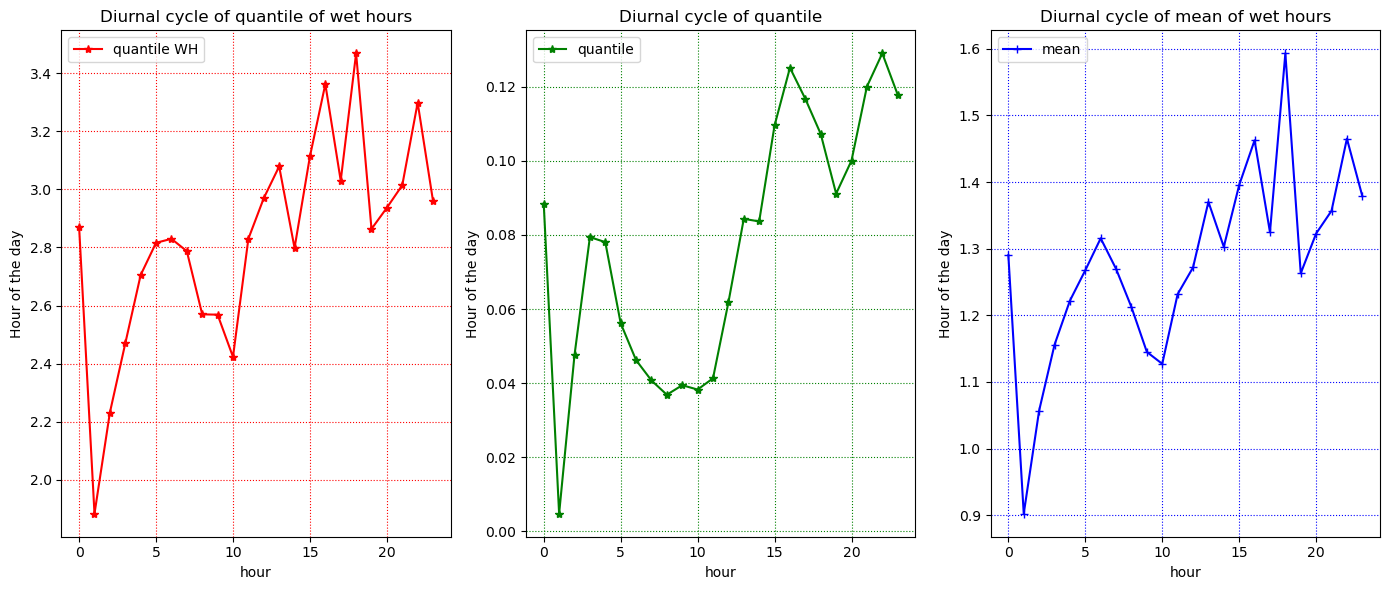

In [21]:
fig,ax=plt.subplots(1,3,figsize=(14,6))
x_q.mean(dim=["x","y"]).plot(marker='*',label='quantile WH',ax=ax[0],color='red')
x_q1.mean(dim=["x","y"]).plot(marker='*',label='quantile',ax=ax[1],color='green')
x_m.mean(dim=["x","y"]).plot(marker='+',label='mean',ax=ax[2],color='blue')
ax[0].set_title(f"Diurnal cycle of quantile of wet hours")
ax[1].set_title(f"Diurnal cycle of quantile")
ax[2].set_title(f"Diurnal cycle of mean of wet hours")
[ax[_].set_ylabel(f"Rainfall [mm]") for _ in np.arange(ax.shape[0])]
[ax[_].set_ylabel(f"Hour of the day") for _ in np.arange(ax.shape[0])]
[ax[_].legend() for _ in np.arange(ax.shape[0])]
ax[0].grid(color='r', linestyle='dotted')
ax[1].grid(color='g', linestyle='dotted')
ax[2].grid(color='b', linestyle='dotted')
# ax[1].set_ylim((0,2.5))
fig.tight_layout()